### **Load libraries**

In [13]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import risk_kit as rk
from mgarch import mgarch
import importlib

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### **Load data**

In [4]:
rets = pd.read_csv('selected_stocks_rets.csv', index_col=0)
stocks = pd.read_csv('selected_stocks_stocks.csv', index_col=0)

In [5]:
# Define the number of periods per year for all calculations
# 252 is an approximation for daily
# 54 for weekly
# 12 for monthly
periods_per_year = 252

### **Initial examination**

In [6]:
summary_stats = rk.summary_stats(rets, periods_per_year=periods_per_year, riskfree_rate=0)
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
BCOLOMBIA.CL,0.391128,0.307314,0.260757,7.001977,0.027322,0.040443,1.272729,-0.170732
BHI.CL,0.237027,0.207723,0.888932,9.704992,0.015323,0.027789,1.141070,-0.109182
BOGOTA.CL,0.079216,0.289167,0.352929,18.298282,0.022000,0.040998,0.273947,-0.242429
BVC.CL,0.177225,0.359447,0.860743,14.129626,0.025402,0.055023,0.493048,-0.222798
CELSIA.CL,0.398728,0.288779,0.487748,9.386538,0.023477,0.037980,1.380737,-0.177687
CORFICOLCF.CL,0.274582,0.315083,0.530906,4.784620,0.027674,0.039346,0.871459,-0.305882
ECOPETROL.CL,-0.108828,0.284052,-0.054319,4.889001,0.029322,0.042622,-0.383127,-0.343342
ENKA.CL,-0.089822,0.302729,0.527893,23.116234,0.020856,0.052610,-0.296707,-0.303036
GEB.CL,0.518068,0.287077,0.331661,9.822320,0.023693,0.037782,1.804629,-0.118774
GRUBOLIVAR.CL,0.041450,0.330824,0.240180,10.794973,0.029177,0.047795,0.125292,-0.277111


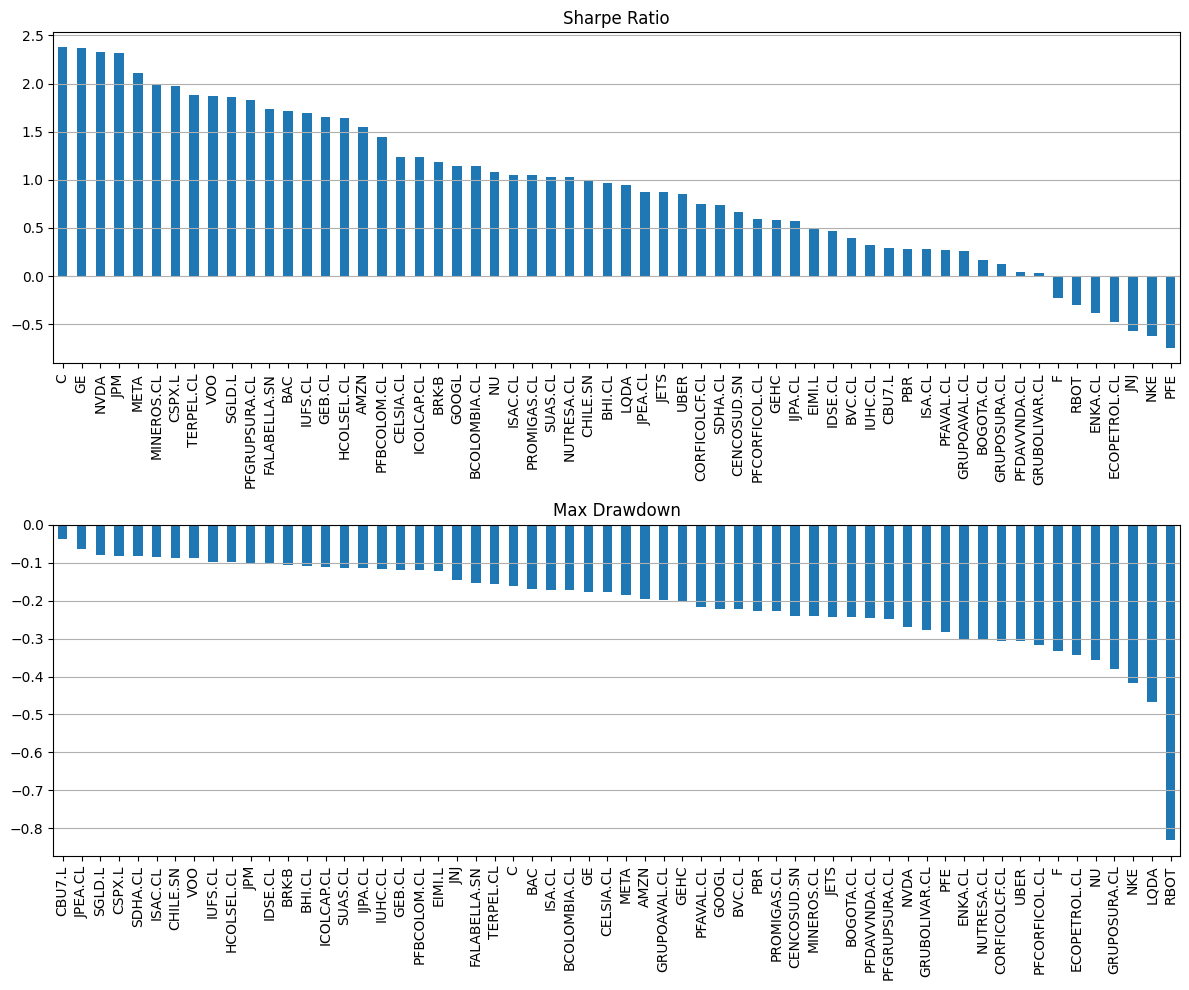

In [7]:
# Plot some return, volatility, and risk rankings to get a view of relevant stocks
summary_stats = rk.summary_stats(rets, periods_per_year=periods_per_year)
#plot1_series = summary_stats['Annualized Return'].sort_values(ascending=False)
#plot2_series = summary_stats['Annualized Volatility'].sort_values(ascending=True)
#plot1_series = summary_stats['Cornish-Fisher VaR (5%)'].sort_values(ascending=False)
#plot2_series = summary_stats['Historic CVaR (5%)'].sort_values(ascending=False)
plot1_series = summary_stats['Sharpe Ratio'].sort_values(ascending=False)
plot2_series = summary_stats['Max Drawdown'].sort_values(ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plot1_series.plot.bar(ax = axes[0], legend=False, title=plot1_series.name)
plot2_series.plot.bar(ax=axes[1], legend=False, title=plot2_series.name)
axes[0].grid(axis='y')
axes[1].grid(axis='y')
plt.tight_layout()

In [8]:
# Identify stock pairs with very high correlation

# Generate correlation matrix
corr_mat = rets.corr()
# Generate a mask to exclude  duplicated pairs
#mask = np.triu(np.ones_like(corr_mat))
#corr_mat = corr_mat*mask
# Convert the matrix into a dataframe structured as a list of pairs with their respective correlations
stack_corr = pd.DataFrame(corr_mat.stack())
stack_corr = stack_corr[stack_corr[0] < 1]
stack_corr = stack_corr[stack_corr[0] != 0]
stack_corr.index.names = ['Stock 1', 'Stock 2']
stack_corr.reset_index(inplace=True)
#(abs(stack_corr[0]) > .7).sum()

# Filter to visualize only the pairs with very high correlations
high_corrs = stack_corr[stack_corr[0] >= 0.8].sort_values(by=0, ascending=False)
high_corrs

,Stock 1,Stock 2,0


In [9]:
# Check the average correlation coefficient of each stock
stack_corr.groupby('Stock 1')[0].mean().sort_values(ascending=False)

Stock 1
VOO              0.201865
C                0.155532
BAC              0.151777
CSPX.L           0.150016
JETS             0.147297
PFBCOLOM.CL      0.145417
JPM              0.143431
EIMI.L           0.142245
AMZN             0.127782
GEB.CL           0.125937
BRK-B            0.123420
F                0.121995
ICOLCAP.CL       0.119408
GEHC             0.114574
NU               0.114013
ISA.CL           0.112330
GOOGL            0.109499
GE               0.107660
MINEROS.CL       0.104447
PFGRUPSURA.CL    0.102773
UBER             0.099829
NVDA             0.097668
META             0.096914
BCOLOMBIA.CL     0.094263
PBR              0.093874
PFCORFICOL.CL    0.093684
GRUBOLIVAR.CL    0.091390
GRUPOSURA.CL     0.086089
PFDAVVNDA.CL     0.083737
CHILE.SN         0.082503
HCOLSEL.CL       0.081233
IJPA.CL          0.079028
ECOPETROL.CL     0.078105
PROMIGAS.CL      0.077748
CORFICOLCF.CL    0.074377
BHI.CL           0.074262
ENKA.CL          0.068116
CELSIA.CL        0.066630
SUAS

### **Covariance matrix estimation**

In [15]:
# Simple long-term covariance
covmat = rets.cov()
returns = summary_stats['Annualized Return']

In [20]:
returns = summary_stats['Annualized Return']

# Recent covariance prediction based on recent days with GARCH model
vol = mgarch('t')
vol.fit(rets)
ndays = 20
covmat = vol.predict(ndays)
covmat = pd.DataFrame(data=covmat['cov'], index=returns.index, columns=returns.index)

C:\Python projects\Finance\lib\site-packages\mgarch\mgarch.py:99: RuntimeWarning: divide by zero encountered in log
  -(self.N/2.)*np.log(np.pi*(dof - 2)) - np.log(np.linalg.det(H_t[i])) \
C:\Python projects\Finance\lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Python projects\Finance\lib\site-packages\numpy\linalg\_linalg.py:2371: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


### **Identify Combination with the maximum Sharpe-Ratio**

In [21]:
# Loop that calculates the combination that maximizes the Sharpe ratio several times until no stock has less than 5% of weight
rf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%
initial_weights = rk.msr(riskfree_rate=rf_rate,
                         returns=returns,
                         covmat=covmat,
                         periods_per_year=periods_per_year)
optimal_allocation = pd.DataFrame(data=initial_weights, index=rets.columns, columns=['Weights']).sort_values(by='Weights')

while optimal_allocation.min().values < .05:
    optimal_allocation = optimal_allocation[1:]
    weights = rk.msr(riskfree_rate=rf_rate,
                     returns=returns[optimal_allocation.index],
                     covmat=covmat.loc[optimal_allocation.index,
                     optimal_allocation.index], 
                     periods_per_year=periods_per_year)
    optimal_allocation = pd.DataFrame(data=weights, index=optimal_allocation.index, columns=['Weights']).sort_values(by='Weights')

chosen_allocation = optimal_allocation
chosen_allocation

,Weights
TERPEL.CL,0.061419
CELSIA.CL,0.069523
ISAC.CL,0.085741
C,0.095548
FALABELLA.SN,0.095905
PFGRUPSURA.CL,0.099544
IUFS.CL,0.111688
MINEROS.CL,0.121986
HCOLSEL.CL,0.126634
GEB.CL,0.132009


In [11]:
"""
# Alternative methodology finding the combination that maximizes the Sharpe ratio and then removing any stock with a weight below 5%
rf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%

weights = rk.msr(riskfree_rate=rf_rate, return_series=rets, periods_per_year=periods_per_year)
optimal_allocation = pd.DataFrame(data=weights.round(4), index=rets.columns, columns=['Weights'])
optimal_allocation = optimal_allocation[optimal_allocation['Weights'] >= .05]

# Reduce the portfolio stocks to only those for which shares of over 3% is recommended
chosen_allocation = optimal_allocation[optimal_allocation['Weights'] > .05]
chosen_allocation = chosen_allocation / chosen_allocation.sum()
chosen_allocation.sort_values(by='Weights')
"""

"\n# Alternative methodology finding the combination that maximizes the Sharpe ratio and then removing any stock with a weight below 5%\nrf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%\n\nweights = rk.msr(riskfree_rate=rf_rate, return_series=rets, periods_per_year=periods_per_year)\noptimal_allocation = pd.DataFrame(data=weights.round(4), index=rets.columns, columns=['Weights'])\noptimal_allocation = optimal_allocation[optimal_allocation['Weights'] >= .05]\n\n# Reduce the portfolio stocks to only those for which shares of over 3% is recommended\nchosen_allocation = optimal_allocation[optimal_allocation['Weights'] > .05]\nchosen_allocation = chosen_allocation / chosen_allocation.sum()\nchosen_allocation.sort_values(by='Weights')\n"

<Axes: xlabel='Date'>

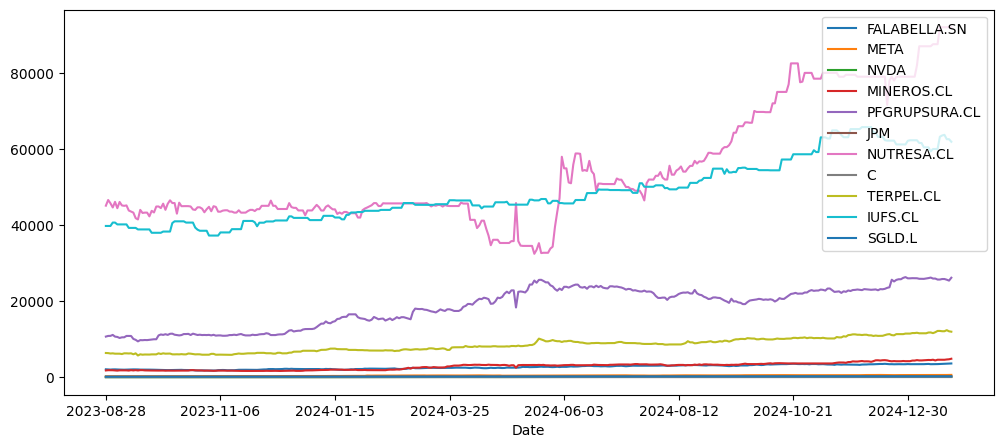

In [12]:
stocks[optimal_allocation.index].plot(figsize=(12, 5))

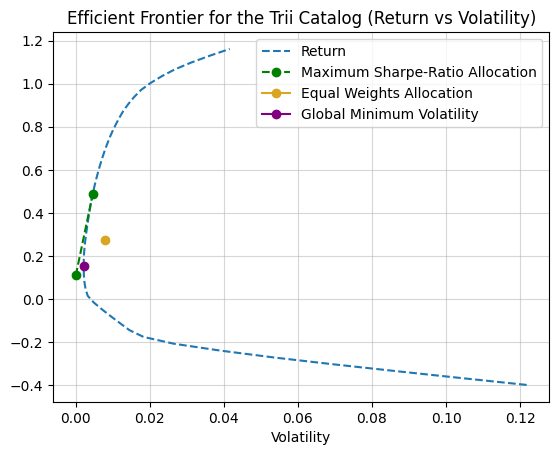

In [22]:
rk.plot_ef(50, style = '--', show_cml=True, show_ew=True, show_gmv=True, riskfree_rate=rf_rate,
           returns=returns, covmat=covmat, periods_per_year=periods_per_year)
plt.title('Efficient Frontier for the Trii Catalog (Return vs Volatility)')
plt.grid(alpha=.5)

### **Create an index for the chosen allocation**

In [23]:
# Generate a dataframe to represent the evolution of the allocation in each stock
weights = chosen_allocation['Weights']
allocated_index = (rets[weights.index] + 1).cumprod()*weights

# Add a column to represent the index
allocated_index['index'] = allocated_index.sum(axis='columns')
allocated_index.index = pd.to_datetime(allocated_index.index.str.split('/').str[0])

# Generate a row to represent an earlier period before returns are made,
# corresponding to the time when the index equal 1
first_period = allocated_index.index[0]
starting_period = first_period - pd.offsets.Week(weekday=6)   # Uncomment to generate a week starting period
#starting_period = first_period - pd.offsets.DateOffset(months=1)   # Uncomment to generate a month starting period
starting_period

allocation_start = pd.DataFrame(index=[starting_period], columns=allocated_index.columns)
allocation_start.iloc[:, :-1] = 1*weights
allocation_start['index'] = 1

# Append the row to the allocated_index dataframe
allocated_index = pd.concat([allocation_start, allocated_index], axis='rows')
allocated_index.head()

,TERPEL.CL,CELSIA.CL,ISAC.CL,C,FALABELLA.SN,PFGRUPSURA.CL,IUFS.CL,MINEROS.CL,HCOLSEL.CL,GEB.CL,index
2023-08-27,0.061419,0.069523,0.085741,0.095548,0.095905,0.099544,0.111688,0.121986,0.126634,0.132009,1.000000
2023-08-28,0.061419,0.068705,0.084825,0.095734,0.096586,0.095642,0.111241,0.117899,0.126634,0.130282,0.988967
2023-08-29,0.061155,0.067751,0.084825,0.096661,0.095225,0.097155,0.111241,0.121922,0.126634,0.127654,0.990223
2023-08-30,0.060122,0.067669,0.084825,0.09585,0.09323,0.097314,0.111241,0.121857,0.126634,0.126978,0.985720
2023-08-31,0.060554,0.066797,0.084825,0.095664,0.09523,0.099544,0.11373,0.121338,0.126493,0.121346,0.985521


In [24]:
# Generate a dataframe with the returns of the index
allocated_index_returns = (allocated_index/allocated_index.shift(1) - 1).dropna()
allocated_index_returns.head()

,TERPEL.CL,CELSIA.CL,ISAC.CL,C,FALABELLA.SN,PFGRUPSURA.CL,IUFS.CL,MINEROS.CL,HCOLSEL.CL,GEB.CL,index
2023-08-28,0.0,-0.011765,-0.01069,0.00194,0.007092,-0.0392,-0.004006,-0.033504,0.0,-0.013083,-0.011033
2023-08-29,-0.004294,-0.013889,0.0,0.009681,-0.014084,0.01582,0.0,0.034115,0.0,-0.020173,0.001269
2023-08-30,-0.016905,-0.001207,0.0,-0.008389,-0.020952,0.001639,0.0,-0.000532,0.0,-0.005294,-0.004548
2023-08-31,0.007194,-0.012893,0.0,-0.001934,0.021449,0.022913,0.022373,-0.004258,-0.001111,-0.044352,-0.000201
2023-09-01,-0.014286,0.0,0.0,0.007266,0.004714,-0.04,0.0,-0.030737,-0.029477,0.009282,-0.010182


In [25]:
summary_stats = rk.summary_stats(allocated_index_returns, periods_per_year=periods_per_year, riskfree_rate=0)
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
TERPEL.CL,0.534025,0.260414,0.761326,9.859587,0.019151,0.030645,2.050679,-0.155206
CELSIA.CL,0.398728,0.288779,0.487748,9.386538,0.023477,0.037980,1.380737,-0.177687
ISAC.CL,0.234873,0.189114,1.218988,24.981799,0.008942,0.026404,1.241967,-0.085264
C,0.644544,0.251253,0.372423,6.695202,0.021036,0.030299,2.565322,-0.162108
FALABELLA.SN,0.456389,0.238593,0.345263,3.775092,0.021373,0.027633,1.912834,-0.152160
PFGRUPSURA.CL,0.788214,0.402256,1.044572,29.642750,0.017386,0.045614,1.959480,-0.249104
IUFS.CL,0.347714,0.181784,2.093439,12.250533,0.007692,0.021308,1.912792,-0.097019
MINEROS.CL,0.916917,0.431400,1.519304,35.547953,0.010987,0.050219,2.125446,-0.241379
HCOLSEL.CL,0.260329,0.136328,1.134673,11.105847,0.008788,0.018216,1.909569,-0.097246
GEB.CL,0.518068,0.287077,0.331661,9.822320,0.023693,0.037782,1.804629,-0.118774


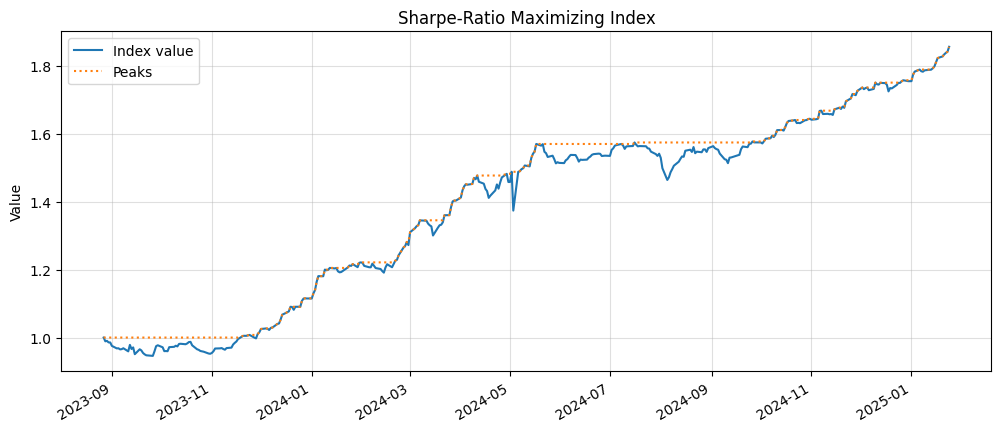

In [26]:
# Visualize the evolution of the index
allocated_index['index'].plot(figsize=(12, 5), label='Index value')
allocated_index['index'].cummax().plot(linestyle=':', label='Peaks')
plt.legend()
plt.ylabel('Value')
plt.title('Sharpe-Ratio Maximizing Index')
plt.grid(alpha=0.4)

### **Export datasets and an index for the Sharpe-Ratio maximizing allocation**

In [27]:
# Allocation index and returns
allocated_index.to_csv('allocated_index.csv')
allocated_index_returns.to_csv('allocated_index_returns.csv')